In [1]:
!pip install libsvm

In [2]:
!unzip DogsVsCats.zip

unzip:  cannot find or open DogsVsCats.zip, DogsVsCats.zip.zip or DogsVsCats.zip.ZIP.


In [4]:
from libsvm.commonutil import svm_read_problem
from libsvm.svmutil import *
from libsvm.svm import *
from sklearn.model_selection import KFold
import numpy as np
import math

train_path = '/Users/alecpeltekian/Documents/CSDS435_HW6/DogsVsCats/DogsVsCats/DogsVsCats.train'
test_path = '/Users/alecpeltekian/Documents/CSDS435_HW6/DogsVsCats/DogsVsCats/DogsVsCats.test'

# read data
y, x = svm_read_problem(train_path)
y_, x_ = svm_read_problem(test_path)



print("Linear Model")
linear_model = svm_train(y, x, '-t 0')
p_label, p_acc, p_val = svm_predict(y_, x_, linear_model)

print("Poly Model")
poly_model = svm_train(y, x, '-t 1')
p_label, p_acc, p_val = svm_predict(y_, x_, poly_model)

print('We can see that linear model has better accuracy for 1 layer of SVM')
print('Now we will test KFold')




kf = KFold(10, True)
#Keep track of the accuracy
linear_model_acc = []
poly_model_acc = []
i = 1
for train_index, test_index in kf.split(x):
    x_test = np.array(x)[test_index]
    x_train = np.array(x)[train_index]
    y_test = np.array(y)[test_index]
    y_train = np.array(y)[train_index]




    print('============= Kfold No.' + str(i) + '  ============')
    print("Linear Model")
    m_linear = svm_train(y_train, x_train, '-t 0')
    _, p_acc, _ = svm_predict(y_test, x_test, m_linear)
    linear_model_acc.append(p_acc[0])


    print("Poly Model")
    m_ploy = svm_train(y_train, x_train, '-t 1')
    _, p_acc, _ = svm_predict(y_test, x_test, m_ploy)
    poly_model_acc.append(p_acc[0])

    i = i + 1




Linear Model
Accuracy = 59.2% (7400/12500) (classification)
Poly Model
Accuracy = 50.096% (6262/12500) (classification)
We can see that linear model has better accuracry for 1 layer of SVM
Now we will test KFold
============= Kfold No.1  ============
Linear Model
Accuracy = 58.16% (727/1250) (classification)
Poly Model
Accuracy = 49.36% (617/1250) (classification)
============= Kfold No.2  ============
Linear Model
Accuracy = 57.68% (721/1250) (classification)
Poly Model
Accuracy = 48.48% (606/1250) (classification)
============= Kfold No.3  ============
Linear Model
Accuracy = 60.56% (757/1250) (classification)
Poly Model
Accuracy = 47.76% (597/1250) (classification)
============= Kfold No.4  ============
Linear Model
Accuracy = 59.6% (745/1250) (classification)
Poly Model
Accuracy = 48.88% (611/1250) (classification)
============= Kfold No.5  ============
Linear Model
Accuracy = 62.32% (779/1250) (classification)
Poly Model
Accuracy = 48.16% (602/1250) (classification)
============= 

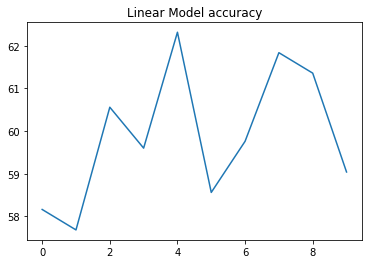

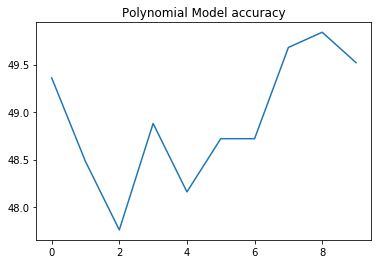

In [5]:
from matplotlib import pyplot as plt
plt.plot(linear_model_acc)
plt.title("Linear Model accuracy")
plt.show()


plt.plot(poly_model_acc)
plt.title("Polynomial Model accuracy")
plt.show()


In [6]:
print('Testing using adaboost')

# keep track of errors
alpha_array = []
error_rate_array = []
# Functions
def adaboost(K, instances, input, target):
    amount_of_instances = len(instances)
    input = np.array(input)
    target = np.array(target)



    weight = np.asarray([1 / amount_of_instances] * amount_of_instances)
    
    for temp in range(K):
        tmp = input - target
        delta = [int(bool(x)) for x in tmp]

        error_rate = np.dot(weight, delta)
        alpha = 1/2 * (math.log((1-error_rate)/error_rate))
        
        alpha_array.append(alpha)
        error_rate_array.append(error_rate)


        new_weight = (weight*(math.exp(alpha)))/sum(weight*(math.exp(alpha)))
        weight = new_weight




Testing using adaboost


Graphing error rate of 10K Fold


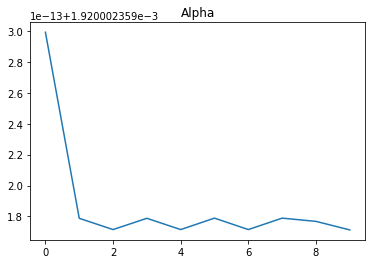

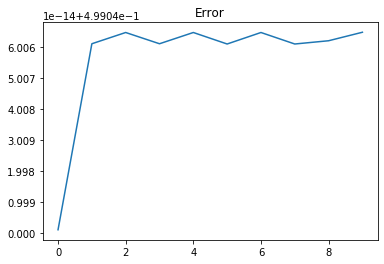

Graphing error rate of 20K Fold


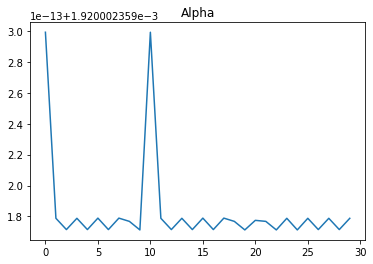

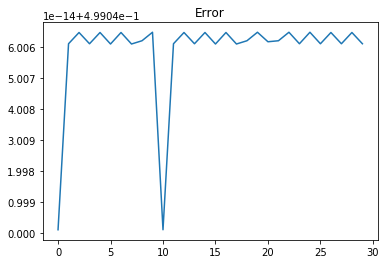

In [7]:
print('Graphing error rate of 10K Fold')
adaboost(10, x_, y_, p_label)
plt.plot(alpha_array)
plt.title('Alpha')
plt.show()

plt.plot(error_rate_array)
plt.title('Error')
plt.show()

print('Graphing error rate of 20K Fold')
adaboost(20, x_, y_, p_label)
plt.plot(alpha_array)
plt.title('Alpha')
plt.show()

plt.plot(error_rate_array)
plt.title('Error')
plt.show()


In [9]:
print('We can see that error rate and alpha still decay after 20 steps which means that there still room for improvement. There are also some sign of being overfitted.')

We can see that error rate and alpha still decay after 20 steps which means that there still room for improvement. There are also some sign of being overfitted.
